# Exercise 02.a: Scale-selective damping

**Due:** _25 November 2020_

**Names:** David, Lukas, Mariana, Linus (for now:D)  (Up to 3 people can submit together.)

Consider the harmonic and biharmonic diffusion equations

$$
  \frac{\partial u}{\partial t} = A_2 \frac{\partial^2 u}{\partial x^2} \quad\text{(harmonic)}
  \qquad\qquad
  \frac{\partial u}{\partial t} = -A_4 \frac{\partial^4 u}{\partial x^4} \quad\text{(biharmonic)}
$$

where $A_2$ and $A_4$ are the positive definite harmonic and biharmonic diffusion coefficients,
respectively.

1. Discretize the harmonic equation in the x direction. Derive the damping time scale as a function of wave number.

1. Discretize the biharmonic equation in the x direction. Derive the damping time scale as a function of wave number.

1. Plot both damping time scales as a function of wave number. How do they differ for long and short waves and why?

1. Derive the damping time scale as a function of wave number for the analytic solution of both equations and compare them to the time scales implied by the finite difference equations.

1. Show that in the limit $\Delta x \rightarrow 0$, the damping time scales of the discretized and of the analytical solution are the same.

**Hint:** Since the analytical solution of both diffusion equations has the form

$$u(x, t) = \hat{u}(t) {\rm e}^{ikx}$$

where $\hat{u}$ is independent of $x$, $i=\sqrt{-1}$ and $k$ is the wave number.
After discretizing the equations in the x direction, one can substitute $u(j\Delta x, t)$
into the discrete equation to get the damping coefficient as a function of wave number $k$.

## 1.)
To discretize the harmonic equation in space, we make use of the derivation of the discrete second order derivative in the script. (eq. 1.12)
With this, the harmonic equation takes the form

$$
\frac{\partial}{\partial t} u_{i} = A_{2}\frac{\partial^{2} u_{i}}{\partial x^{2}} = A_{2}\frac{u_{i+1}-2 u_{i}+u_{i-1}}{\Delta x^2}
$$

Substituting the analytical solution for each gridpoint 

$$
u_{j}(x,t) = \hat{u}(t) e^{i k (j \Delta x)}
$$

as given in the hint, yields

\begin{align}
\frac{\partial}{\partial t} \hat{u}(t) e^{i k j \Delta x} &= \hat{u}(t)\frac{A_{2}}{\Delta x^2}\left( e^{i k (j+1) \Delta x}-2  e^{i k j \Delta x} +  e^{i k (j-1) \Delta x} \right) \notag \\
&= \frac{A_{2}}{\Delta x^2}\left( e^{i k j \Delta x} e^{i k \Delta x}-2  e^{i k j \Delta x} +  e^{i k j \Delta x} e^{i k \Delta x} \right)\hat{u}(t).
\end{align}

Deviding by $e^{i k j \Delta x}$ then leaves

$$
\frac{\partial}{\partial t} \hat{u}(t) = \frac{A_{2}}{\Delta x^2} \left( e^{i k  \Delta x} + e^{- i k \Delta x} -2 \right) \hat{u}(t) 
$$

Using $ e^{i k  \Delta x} + e^{- i k \Delta x} = 2 \cos(k \Delta x)$ simplifies above to 

$$
\frac{\partial}{\partial t} \hat{u}(t) = \frac{2 A_{2}}{\Delta x^2} \left( \cos(k \Delta x) -1 \right) \hat{u}(t).
$$

While this simple ODE is well understood, the solution for $\hat{u}(t)$ is of form

$$
\hat{u}(t) \propto e^{\frac{2 A_{2}}{\Delta x^2} \left( \cos(k \Delta x) -1 \right) t},
$$

where the damping time scale can be identified as the negative inverse of the exponent (since $\hat{u}(t)\propto e^{-\frac{t}{\tau}}$):

$$
\tau = \frac{\Delta x^2}{ 2 A_{2}\left(1- \cos(k \Delta x) \right)}
$$

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def tau(k,dx)

Discretized $x$ in spatial direction on a grid $G={ x: x=\frac{1}{2}(i)} $ with $i=0,1,2,...20$

In [76]:
D = Diffusion()

In [75]:
class Diffusion:
    def __init__(self, params=None):
        if params is None:
            params  = {'N': 21, 'L': 10, 'A_2': 1., 'A_4': 1.}
            
        self.N     = params['N']
        self.L     = params['L']
        self.A_2   = params['A_2']
        self.A_4   = params['A_4']
        self.dx    = self.L / (self.N -1)
        self.x     = self.dx*np.arange(self.N)
        self.A_h   = self.A_harmonic()
        self.A_b   = self.A_biharmonic()
        
    def A_harmonic(self):
        #harmonic matrix:
        A = np.zeros((self.N-2, self.N-2))
        indices = np.arange(self.N -2)

        # set diagonal
        A[indices, indices] = -2 / self.dx ** 2

        # set off-diagonal
        A[indices[:-1], indices[:-1] + 1] = 1 / self.dx ** 2
        A[indices[:-1] + 1, indices[:-1]] = 1 / self.dx ** 2
        return A
    
    def A_biharmonic(self):
        #harmonic matrix:
        A = self.A_h * self.A_h
        return A
    
    def display(self):
        print('N:      ', self.N)
        print('L:      ', self.L)
        print('A_2:    ', self.A_2)
        print('A_4:    ', self.A_4)
        print('dx:     ', self.dx)
        print('x:      ', self.x)
        
    def tau_h(self, k):
        return(self.dx**2 / (2*self.A_2*(1-np.cos(k*self.dx))))
    
    def tau_b(self, k):
        return(self.dx**4/(24*self.A_4*(np.cos(k*self.dx)-1)*(1-(self.A_2/self.dx**4))))
    
    def tau_plot(self, k):
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(k,self.tau_h(k),color='midnightblue',label='harmonic')
        ax2.plot(k,self.tau_b(k),color='darkred',label='biharmonic')
        ax1.set_ylabel(r'$\tau$ harmonic')
        ax2.set_ylabel(r'$\tau$ biharmonic')
        ax1.set_xlabel(r'$k$')
        plt.show()

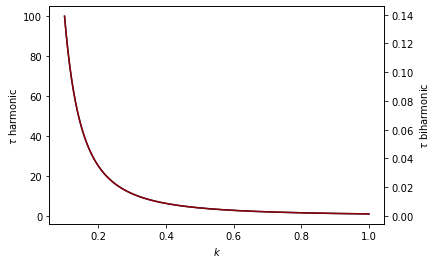

In [77]:
D.tau_plot(k)

In [50]:
k = np.linspace(0.1,1,1000)

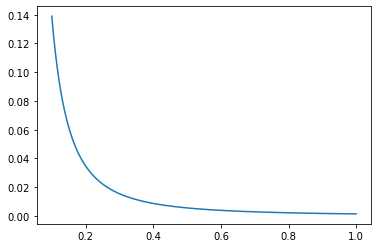

In [55]:
plt.plot(k,D.tau_b(k))